================================================================================
# ANEXO

## PROBABLES MEJORAS A FUTURO        version 9 / 39-oct 22:48

### *Trabajo en curso*

1 Crear lista categorias = df_ventas_final["categoria"].unique()  

2 Crear tabla df_producto con id_producto, producto, id_categoria, categoria

Se observó que:
1. Las ventas contienen productos con la misma denominación, sin ninguna id como para identificarlos. Pertenecen a distintas ventas individuales y tienen distinto precio.

2. Por tal razón es dificil hacer una evaluación seria del resultado de la campaña publicitaria, porque corresponde a distintos productos agrupados, con precio sin adjudicar.

3. La campaña de marketing posee el costo publicitario por producto (generico/agregado) pero no hay como relacionarlo con el costo_unitario, ni con el precio_venta

4. Sacar un precio_promedio, no estoy seguro que sirva mucho, porque la venta podria haberse hecho a un valor menor que el precio_unitario_promedio, debido a la gran dispersión de precios

Hemos visto que para el producto "Adorno de pared", los precios estan distibuidos en 3 segmentos o rangos, la idea es hacer un promedio por rango y
luego renombrar los productos segun el rango, por ej:
"Adorno de pared" => "Adorno de pared R1"

De esta manera en lugar de tener 100 productos genericos los tendriamos divididos por rango de precios y con un nuevo nombre_producto que los represente
  


In [3]:
import pandas as pd

# Import dataset ventas final
url = "https://raw.githubusercontent.com/alex-degarate/TT-2C2025-Data-Analitycs-Notebooks/main/PreEntrega/Datasets/"

df_ventas_final = pd.read_csv( url + "ventas_final.csv")



In [4]:
# Import dataset clientes
#df_clientes_final = pd.read_csv( url + "clientes_final.csv")

In [5]:
# Import dataset marketing
df_marketing_final = pd.read_csv( url + "marketing_final.csv")

In [6]:
df_marketing_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


In [7]:
# Hacemos una copia para hacer pruebas
df_pp_ventas = df_ventas_final.copy()
df_pp_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     2998 non-null   int64  
 1   producto     2998 non-null   object 
 2   precio_unit  2998 non-null   float64
 3   cantidad     2998 non-null   int64  
 4   fecha_venta  2998 non-null   object 
 5   categoria    2998 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 140.7+ KB


In [ ]:
# @title
df_pp_ventas[ df_pp_ventas["producto"] == "Adorno de pared"].count()
# "producto"] == "Adorno de pared"] hay => 100
# df_pp_ventas.sort_values(by="producto", ascending=True, inplace=False)

df_pp_ventas[ df_pp_ventas["producto"] == "Adorno de pared"]

In [8]:
df_pp_ventas.head()

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos


In [9]:
#df_pp_ventas[ df_pp_ventas["producto"] == "Adorno de pared"].count()
# "producto"] == "Adorno de pared"] hay => 100
df_pp_ventas.sort_values(by="producto", ascending=True, inplace=False)
df_pp_ventas[ df_pp_ventas["producto"] == "Adorno de pared"]

# "Cuadro decorativo"] hay 100
#df_pp_ventas[ df_pp_ventas["producto"] == "Cuadro decorativo"].count()
#df_pp_ventas[ df_pp_ventas["producto"] == "Cuadro decorativo"].mean()

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria
17,630,Adorno de pared,71.99,9,2024-01-04,Decoración
38,560,Adorno de pared,57.62,6,2024-01-07,Decoración
72,830,Adorno de pared,67.23,10,2024-01-10,Decoración
101,20,Adorno de pared,90.21,2,2024-01-14,Decoración
112,260,Adorno de pared,101.48,9,2024-01-15,Decoración
...,...,...,...,...,...,...
2881,370,Adorno de pared,93.19,8,2024-12-16,Decoración
2884,980,Adorno de pared,75.85,6,2024-12-16,Decoración
2919,800,Adorno de pared,116.74,3,2024-12-21,Decoración
2949,120,Adorno de pared,64.26,6,2024-12-25,Decoración


In [10]:
#df_pp_ventas = df_pp_ventas.sort_values(by="producto", ascending=True)
df_pp_ventas[df_pp_ventas["producto"] == "Adorno de pared"].head(100)

#sort_values(by="valor_venta", ascending=False, inplace=True)
#df_pp_ventas.head()

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria
17,630,Adorno de pared,71.99,9,2024-01-04,Decoración
38,560,Adorno de pared,57.62,6,2024-01-07,Decoración
72,830,Adorno de pared,67.23,10,2024-01-10,Decoración
101,20,Adorno de pared,90.21,2,2024-01-14,Decoración
112,260,Adorno de pared,101.48,9,2024-01-15,Decoración
...,...,...,...,...,...,...
2881,370,Adorno de pared,93.19,8,2024-12-16,Decoración
2884,980,Adorno de pared,75.85,6,2024-12-16,Decoración
2919,800,Adorno de pared,116.74,3,2024-12-21,Decoración
2949,120,Adorno de pared,64.26,6,2024-12-25,Decoración


## Hacemos una nueva copia de df_pp_ventas
para transferir datos desde df_adorno_pared

In [11]:
# Hacemos una copia para hacer pruebas
df_pp_ventas2 = df_pp_ventas.copy()
df_pp_ventas2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     2998 non-null   int64  
 1   producto     2998 non-null   object 
 2   precio_unit  2998 non-null   float64
 3   cantidad     2998 non-null   int64  
 4   fecha_venta  2998 non-null   object 
 5   categoria    2998 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 140.7+ KB


# Creamos el df_producto
Para hacer de enlace como clave primaria entre ventas y marketing


In [50]:
# CREAR TABLA [ producto ]
# Crear un nuevo DF con productos unicos y sus categorias de df_pp_ventas
df_producto = df_pp_ventas[["producto", "categoria"]].drop_duplicates().reset_index(drop=True)

# Create a unique id_producto for each product
df_producto["id_producto"] = df_producto.index + 1

# Create a unique id_categoria for each category
df_producto["id_categoria"] = df_producto["categoria"].astype('category').cat.codes + 1

# Reorder columns to match the requested order
df_producto = df_producto[["id_producto", "producto", "id_categoria", "categoria"]]

# Visualizar el nuevo DF
display(df_producto.head())


,id_producto,producto,id_categoria,categoria
0,1,Cuadro decorativo,1,Decoración
1,2,Lámpara de mesa,1,Decoración
2,3,Secadora,2,Electrodomésticos
3,4,Heladera,2,Electrodomésticos
4,5,Horno eléctrico,2,Electrodomésticos


In [13]:
# ventas_categoria.sort_values(by="valor_venta", ascending=False, inplace=True)
# mal df_pp_ventas[df_pp_ventas["producto"]].sum()

# IMPRIMIR la lista de productos ordenados alfabeticamente y las ventas
#----------------------------------------------------
df_pp_ventas["producto"].value_counts().sort_index()
#---------------------------------------------------

,count
producto,
Adorno de pared,100
Alfombra,100
Aspiradora,100
Auriculares,143
Batidora,100
Cafetera,117
Candelabro,24
Consola de videojuegos,99
Cortinas,100


## ANALISIS del campo "Adorno de pared"

In [17]:
df_pp_ventas[df_pp_ventas["producto"] == "Adorno de pared"]["precio_unit"].mean()

np.float64(76.0978)

In [ ]:
# Filtramos el DF por el producto "Adorno de pared" y calculamos la media de 'precio_unit'
mean_precio_adorno_pared = df_pp_ventas[df_pp_ventas["producto"] == "Adorno de pared"]["precio_unit"].mean()

print(f"El precio promedio para 'Adorno de pared' es: {mean_precio_adorno_pared:.2f}")

El precio promedio para 'Adorno de pared' es: 76.10


# Generamos la tabla [ Adorno de pared ]

In [22]:
# Generamos una tabla aislada para el producto "Adorno de pared"
df_adorno_pared = df_pp_ventas[df_pp_ventas["producto"] == "Adorno de pared"].copy()

media = df_adorno_pared["precio_unit"].mean()
print(f"The mean price for 'Adorno de pared' is: {media:.2f}")
df_adorno_pared.describe()

The mean price for 'Adorno de pared' is: 76.10


,id_venta,precio_unit,cantidad
count,100.00000,100.000000,100.000000
mean,505.00000,76.097800,6.330000
std,290.11492,27.023575,3.088117
min,10.00000,27.890000,1.000000
25%,257.50000,54.297500,4.000000
50%,505.00000,78.395000,6.000000
75%,752.50000,100.745000,9.000000
max,1000.00000,119.300000,12.000000


In [23]:
df_adorno_pared.head()


,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria
17,630,Adorno de pared,71.99,9,2024-01-04,Decoración
38,560,Adorno de pared,57.62,6,2024-01-07,Decoración
72,830,Adorno de pared,67.23,10,2024-01-10,Decoración
101,20,Adorno de pared,90.21,2,2024-01-14,Decoración
112,260,Adorno de pared,101.48,9,2024-01-15,Decoración


## # Como vemos hay mucha dispersion del precio_unit

In [ ]:
# @title
# Agregamos un plot para visualizar graficamente la distribución
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.histplot(df_adorno_pared["precio_unit"], bins=100, kde=True, edgecolor="black")
plt.title("Distribución de precio_unit - 'Adorno de pared' ")
plt.xlabel("Precio Unitario ($)")
plt.ylabel("Frecuencia")

# Seteamos x-axis ticks a intervalo s de 10
plt.xticks(np.arange(0, df_adorno_pared["precio_unit"].max() + 10, 10))

plt.show()

Observamos que hay 3 rangos de precios de el producto "Adorno de pared"
Lo cual hace pensar que es uns subcategoria, con productos diferentes y precio_unit diferente

In [24]:
# Calculamos percentilo 33 de 'precio_unit'
q33_precio_adorno_pared = df_adorno_pared["precio_unit"].quantile(0.33)

print(f"El percentilo 33 del precio para 'Adorno de pared' es: {q33_precio_adorno_pared:.2f}")

# Calculamos el percentilo 66 de 'precio_unit'
q66_precio_adorno_pared = df_adorno_pared["precio_unit"].quantile(0.66)
print(f"El percentilo 66 del precio para 'Adorno de pared' es: {q66_precio_adorno_pared:.2f}")

El percentilo 33 del precio para 'Adorno de pared' es: 65.67
El percentilo 66 del precio para 'Adorno de pared' es: 90.64


In [25]:
# Definimos los bins (puntos de corte)
bins = [25, 66, 91, 120]

# Definimos las etiquetas para los rangos
labels = ['25-66', '66-91', '91-120']

# Creamos una nueva columna 'precio_rango' para estratificar 'precio_unit' dentro de los cut-off
df_adorno_pared['precio_rango'] = pd.cut(df_adorno_pared['precio_unit'], bins=bins, labels=labels, right=False)

# Mostramos la cantidad de items precios en cada rango de precios
display(df_adorno_pared['precio_rango'].value_counts())

# Display the first few rows with the new column
display(df_adorno_pared.head(15))

,count
precio_rango,
91-120,34
25-66,33
66-91,33


,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,precio_rango
17,630,Adorno de pared,71.99,9,2024-01-04,Decoración,66-91
38,560,Adorno de pared,57.62,6,2024-01-07,Decoración,25-66
72,830,Adorno de pared,67.23,10,2024-01-10,Decoración,66-91
101,20,Adorno de pared,90.21,2,2024-01-14,Decoración,66-91
112,260,Adorno de pared,101.48,9,2024-01-15,Decoración,91-120
141,430,Adorno de pared,81.76,5,2024-01-18,Decoración,66-91
151,30,Adorno de pared,76.92,6,2024-01-19,Decoración,66-91
185,80,Adorno de pared,51.56,5,2024-01-23,Decoración,25-66
221,310,Adorno de pared,103.79,2,2024-01-27,Decoración,91-120
255,50,Adorno de pared,83.10,5,2024-01-31,Decoración,66-91


Creamos una nueva columna 'rango' para saber a cual de los 3 rangos pertenece

In [30]:
# Creamos una nueva columna 'rango'
range_mapping = {'25-66': 'R1', '66-91': 'R2', '91-120': 'R3'}
df_adorno_pared['rango'] = df_adorno_pared['precio_rango'].map(range_mapping)

In [31]:
df_adorno_pared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 17 to 2980
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id_venta      100 non-null    int64   
 1   producto      100 non-null    object  
 2   precio_unit   100 non-null    float64 
 3   cantidad      100 non-null    int64   
 4   fecha_venta   100 non-null    object  
 5   categoria     100 non-null    object  
 6   precio_rango  100 non-null    category
 7   rango         100 non-null    category
dtypes: category(2), float64(1), int64(2), object(3)
memory usage: 10.0+ KB


In [32]:
df_adorno_pared.head()

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,precio_rango,rango
17,630,Adorno de pared,71.99,9,2024-01-04,Decoración,66-91,R2
38,560,Adorno de pared,57.62,6,2024-01-07,Decoración,25-66,R1
72,830,Adorno de pared,67.23,10,2024-01-10,Decoración,66-91,R2
101,20,Adorno de pared,90.21,2,2024-01-14,Decoración,66-91,R2
112,260,Adorno de pared,101.48,9,2024-01-15,Decoración,91-120,R3


## Para la tabla df_adorno_pared, en el campo [producto],renombramos la descripcion del producto

In [36]:

# Yo RENOMBRE la desc producto, pero tal vez seria mejor agregar un
# campo con la clasif x RANGO

# Observamos que hay 3 rangos de datos para Adorno de pared
# Calculamos esos rangos dividiendolos en terciles

# Recorre la tabla sacada de ventas_final, para el producto "Adorno de pared"
nLenght = df_adorno_pared.shape[0]
rango1 = [0, 0]
rango2 = [0, 0]
rango3 = [0, 0]

#        df_adorno_pared.iat[ num_fila, num_col ]  con indice= 0
# print( df_adorno_pared.iat[0, 2])

for i in range(nLenght):
    pu = df_adorno_pared.iat[i, 2]
    nomP = df_adorno_pared.iat[i, 1]
    if pu >= 25 and pu <=66:
        rango1[0] += pu
        rango1[1] += 1
        df_adorno_pared.iat[i, 1] = nomP + "-R1"

    elif pu > 66 and pu <=91:
        rango2[0] += pu
        rango2[1] += 1
        df_adorno_pared.iat[i, 1] = nomP + "-R2"

    elif pu > 91 and pu <=120:
        rango3[0] += pu
        rango3[1] += 1
        df_adorno_pared.iat[i, 1] = nomP + "-R3"

In [37]:
# Calculamos las medias x rango
media_rango1 = round( rango1[0]/rango1[1], 2)
media_rango2 = round( rango2[0]/rango2[1], 2)
media_rango3 = round( rango3[0]/rango3[1], 2)

#Visualizamos las medias
print(f"media_rango1 : {media_rango1}")
print(f"media_rango2 : {media_rango2}")
print(f"media_rango3 : {media_rango3}")

# En las celdas de mas abajo lo graficamos

media_rango1 : 44.39
media_rango2 : 78.29
media_rango3 : 105.74


In [38]:
display(df_adorno_pared.head(15))

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,precio_rango,rango
17,630,Adorno de pared-R2,71.99,9,2024-01-04,Decoración,66-91,R2
38,560,Adorno de pared-R1,57.62,6,2024-01-07,Decoración,25-66,R1
72,830,Adorno de pared-R2,67.23,10,2024-01-10,Decoración,66-91,R2
101,20,Adorno de pared-R2,90.21,2,2024-01-14,Decoración,66-91,R2
112,260,Adorno de pared-R3,101.48,9,2024-01-15,Decoración,91-120,R3
141,430,Adorno de pared-R2,81.76,5,2024-01-18,Decoración,66-91,R2
151,30,Adorno de pared-R2,76.92,6,2024-01-19,Decoración,66-91,R2
185,80,Adorno de pared-R1,51.56,5,2024-01-23,Decoración,25-66,R1
221,310,Adorno de pared-R3,103.79,2,2024-01-27,Decoración,91-120,R3
255,50,Adorno de pared-R2,83.10,5,2024-01-31,Decoración,66-91,R2


In [51]:
df_producto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_producto   30 non-null     int64 
 1   producto      30 non-null     object
 2   id_categoria  30 non-null     int8  
 3   categoria     30 non-null     object
dtypes: int64(1), int8(1), object(2)
memory usage: 882.0+ bytes


In [52]:
df_producto.head(30)

,id_producto,producto,id_categoria,categoria
0,1,Cuadro decorativo,1,Decoración
1,2,Lámpara de mesa,1,Decoración
2,3,Secadora,2,Electrodomésticos
3,4,Heladera,2,Electrodomésticos
4,5,Horno eléctrico,2,Electrodomésticos
5,6,Plancha de vapor,2,Electrodomésticos
6,7,Proyector,3,Electrónica
7,8,Rincón de plantas,1,Decoración
8,9,Candelabro,1,Decoración
9,10,Aspiradora,2,Electrodomésticos


In [42]:
# Agregamos el campo ["media_rango"] a tabla df_adorno_pared
df_adorno_pared["media_rango"] = df_adorno_pared.apply(lambda row: media_rango1 if row["precio_rango"] == "25-66" else
                                                        media_rango2 if row["precio_rango"] == "66-91" else
                                                        media_rango3, axis=1)

In [43]:
df_adorno_pared.head(15)

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,precio_rango,rango,media_rango
17,630,Adorno de pared-R2,71.99,9,2024-01-04,Decoración,66-91,R2,78.29
38,560,Adorno de pared-R1,57.62,6,2024-01-07,Decoración,25-66,R1,44.39
72,830,Adorno de pared-R2,67.23,10,2024-01-10,Decoración,66-91,R2,78.29
101,20,Adorno de pared-R2,90.21,2,2024-01-14,Decoración,66-91,R2,78.29
112,260,Adorno de pared-R3,101.48,9,2024-01-15,Decoración,91-120,R3,105.74
141,430,Adorno de pared-R2,81.76,5,2024-01-18,Decoración,66-91,R2,78.29
151,30,Adorno de pared-R2,76.92,6,2024-01-19,Decoración,66-91,R2,78.29
185,80,Adorno de pared-R1,51.56,5,2024-01-23,Decoración,25-66,R1,44.39
221,310,Adorno de pared-R3,103.79,2,2024-01-27,Decoración,91-120,R3,105.74
255,50,Adorno de pared-R2,83.10,5,2024-01-31,Decoración,66-91,R2,78.29


Modificar la tabla producto para incorporar los campos ["precio_rango"], ["media_rango"], ["rango"]

In [ ]:
# la tabla producto debe contener un campo ["id_producto"] que incluya los 3 rangos
# 101, 102, 103, 111, 112, 113, 121, 122, 123, etc

## REORGANIZAR LA TABLA PRODUCTO
1. Ordenar la tabla df_producto Alfabeticamente  
2. Por cada id_producto => id_prod+ {rango} entre 1-3   
   ej: id_prod = 1  ==>   11, 12, 13
                 2  ==>  21, 22, 23
3. producto ==> producto + "-R1"    
   ej "Adorno de pared"  ==> "Adorno de pared-R1"             
4. cada uno con la [id_categoria] y  [categoria] que le corresponde

se puede copiar/modificar a df_producto2     

In [ ]:
'''
# 1. Ordenar la tabla df_producto Alfabeticamente
df_producto = df_producto.sort_values(by="producto").reset_index(drop=True)

# 2. Create a list to hold the data for the new DataFrame
producto_ranged_data = []

# Iterate through each unique product in the original df_producto
for index, row in df_producto.iterrows():
    prod_id = row['id_producto']
    prod_name = row['producto']
    cat_id = row['id_categoria']
    cat_name = row['categoria']

    # Check if the product is "Adorno de pared" and has range information in df_adorno_pared
    if prod_name == "Adorno de pared" and 'rango' in df_adorno_pared.columns:
        # If it has ranges, create an entry for each range
        for r in ['R1', 'R2', 'R3']:
            # Convert prod_id to string before concatenation
            new_prod_id = f"{str(prod_id).zfill(2)}{r.replace('R', '')}"
            new_prod_name = f"{prod_name}-{r}"
            # Find the media_rango for this specific product and range from df_adorno_pared
            media_rango_val = df_adorno_pared[df_adorno_pared['rango'] == r]['media_rango'].mean()

            producto_ranged_data.append({
                'prod_id': new_prod_id,
                'prod_name': new_prod_name,
                'cat_id': cat_id,
                'cat_name': cat_name,
                'precio_rango_label': f"{r}", # Store the range label directly
                'media_rango': media_rango_val
            })
    else:
        # If it doesn't have ranges, add the original product information
         producto_ranged_data.append({
                'prod_id': str(prod_id).zfill(2),
                'prod_name': prod_name,
                'cat_id': cat_id,
                'cat_name': cat_name,
                'precio_rango_label': None,
                'media_rango': None
            })

# Create the new DataFrame from the list of data
df_producto = pd.DataFrame(producto_ranged_data)

# Display the reorganized df_producto
display(df_producto.head())
'''

In [53]:
# CREAR TABLA [ producto ]
# Crear un nuevo DF con productos unicos y sus categorias de df_pp_ventas
lista_producto = df_pp_ventas[["producto", "categoria"]].drop_duplicates().reset_index(drop=True)

# Create a unique id_producto for each product
#df_producto["id_producto"] = df_producto.index + 1

# Create a unique id_categoria for each category
#df_producto["id_categoria"] = df_producto["categoria"].astype('category').cat.codes + 1#

# Reorder columns to match the requested order
df_producto = df_producto[["id_producto", "producto", "id_categoria", "categoria"]]

# Visualizar el nuevo DF
#display(df_producto.head())


In [97]:
lista_producto.sort_values(by="producto").reset_index(drop=True)

,producto,categoria
0,Adorno de pared,Decoración
1,Alfombra,Decoración
2,Aspiradora,Electrodomésticos
3,Auriculares,Electrónica
4,Batidora,Electrodomésticos
5,Cafetera,Electrodomésticos
6,Candelabro,Decoración
7,Consola de videojuegos,Electrónica
8,Cortinas,Decoración
9,Cuadro decorativo,Decoración


In [98]:
df_producto2 = df_producto.copy()
df_producto2.head()

,id_producto,producto,id_categoria,categoria
0,1,Cuadro decorativo,1,Decoración
1,2,Lámpara de mesa,1,Decoración
2,3,Secadora,2,Electrodomésticos
3,4,Heladera,2,Electrodomésticos
4,5,Horno eléctrico,2,Electrodomésticos


In [101]:
df_producto2 = df_producto2.sort_values(by="producto").reset_index(drop=True)

In [131]:
df_producto2.tail()

,id_producto,producto,id_categoria,categoria
25,0,Secadora,2,Electrodomésticos
26,0,SmartWatch,3,Electrónica
27,0,Smartphone,3,Electrónica
28,0,Tablet,3,Electrónica
29,0,Televisor,3,Electrónica


In [111]:
df_producto2["id_producto"] = 0
display(df_producto2.head())

,id_producto,producto,id_categoria,categoria
0,0,Adorno de pared,1,Decoración
1,0,Alfombra,1,Decoración
2,0,Aspiradora,2,Electrodomésticos
3,0,Auriculares,3,Electrónica
4,0,Batidora,2,Electrodomésticos


In [126]:
# Create an empty DataFrame with the same columns as df_producto2
df_producto3 = pd.DataFrame(columns=df_producto2.columns)
df_producto3["rango"] = ""
df_producto3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_producto   0 non-null      object
 1   producto      0 non-null      object
 2   id_categoria  0 non-null      object
 3   categoria     0 non-null      object
 4   rango         0 non-null      object
dtypes: object(5)
memory usage: 132.0+ bytes


In [127]:

arango = ["","R1","R2","R3"]
nLenght2 = df_producto2.shape[0]

myid = 100
idx3 = 1

for index in range(nLenght2):

    idx = index
    # Select the row at index 0 from df_producto2
    row_to_copy = df_producto2.iloc[idx]
    #print(row_to_copy)

    nomP = df_producto2.iat[index, 1]
    idcat= df_producto2.iat[index, 2]
    catP = df_producto2.iat[index, 3]

    for j in range(1, 4):  # de 1-3
        # Append the selected row to df_producto3
        myid += 1
        df_producto3.loc[idx3] = [myid, nomP +'-'+ arango[j], idcat, catP, arango[j]]
        idx3 += 1
        #df_producto3 = pd.concat([df_producto3, pd.DataFrame([row_to_copy])], ignore_index=True)

    myid += 7



In [130]:
df_producto3.tail(50)

,id_producto,producto,id_categoria,categoria,rango
41,232,Freidora eléctrica-R2,2,Electrodomésticos,R2
42,233,Freidora eléctrica-R3,2,Electrodomésticos,R3
43,241,Heladera-R1,2,Electrodomésticos,R1
44,242,Heladera-R2,2,Electrodomésticos,R2
45,243,Heladera-R3,2,Electrodomésticos,R3
46,251,Horno eléctrico-R1,2,Electrodomésticos,R1
47,252,Horno eléctrico-R2,2,Electrodomésticos,R2
48,253,Horno eléctrico-R3,2,Electrodomésticos,R3
49,261,Jarrón decorativo-R1,1,Decoración,R1
50,262,Jarrón decorativo-R2,1,Decoración,R2


In [132]:
df_producto3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 1 to 90
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_producto   90 non-null     int64 
 1   producto      90 non-null     object
 2   id_categoria  90 non-null     int8  
 3   categoria     90 non-null     object
 4   rango         90 non-null     object
dtypes: int64(1), int8(1), object(3)
memory usage: 3.6+ KB


In [ ]:
# Create an empty DataFrame with the same columns as df_producto2
df_producto3 = pd.DataFrame(columns=df_producto2.columns)

# Select the row at index 0 from df_producto2
row_to_copy = df_producto2.iloc[0]

# Append the selected row to df_producto3
df_producto3 = pd.concat([df_producto3, pd.DataFrame([row_to_copy])], ignore_index=True)

# Display the new df_producto3
display(df_producto3.head())

## Cuadro decorativo

In [ ]:
# "Cuadro decorativo"] hay 100
#df_pp_ventas[ df_pp_ventas["producto"] == "Cuadro decorativo"].count()
#df_pp_ventas[ df_pp_ventas["producto"] == "Cuadro decorativo"].mean()

In [ ]:
#df_pp_ventas = df_pp_ventas.sort_values(by="producto", ascending=True)
df_pp_ventas[df_pp_ventas["producto"] == "Cuadro decorativo"].head(100)


## Generamos la tabla [ df_cuadro_decorativo ]

In [ ]:

# Generamos una tabla aislada para el producto "Cuadro decorativo"
df_cuadro_decorativo = df_pp_ventas[df_pp_ventas["producto"] == "Cuadro decorativo"].copy()

media = df_cuadro_decorativo["precio_unit"].mean()
print(f"El precio promedio para 'Cuadro decorativo' es: {media:.2f}")
df_cuadro_decorativo.describe()

El precio promedio para 'Cuadro decorativo' es: 74.58


,id_venta,precio_unit,cantidad
count,100.00000,100.000000,100.000000
mean,497.00000,74.578000,7.260000
std,290.11492,29.275527,3.395243
min,2.00000,26.200000,1.000000
25%,249.50000,51.262500,5.000000
50%,497.00000,75.125000,8.000000
75%,744.50000,101.342500,10.000000
max,992.00000,124.830000,12.000000


In [ ]:
## Como vemos

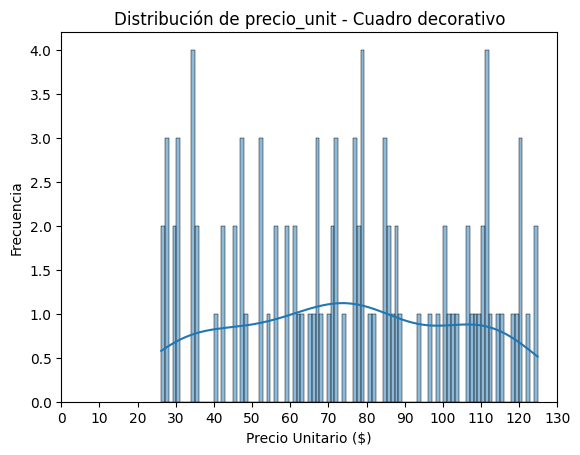

In [ ]:
# @title
# Agregamos un plot para visualizar graficamente la distribución
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.histplot( df_cuadro_decorativo["precio_unit"], bins=100, kde=True, edgecolor="black")
plt.title("Distribución de precio_unit - Cuadro decorativo")
plt.xlabel("Precio Unitario ($)")
plt.ylabel("Frecuencia")

# Seteamos x-axis ticks a intervalo s de 10
plt.xticks(np.arange(0, df_cuadro_decorativo ["precio_unit"].max() + 10, 10))

plt.show()

In [ ]:
# Calculamos percentilo 33 de 'precio_unit'
q33_precio_cuadro_decorativo = df_cuadro_decorativo["precio_unit"].quantile(0.33)

print(f"El percentilo 33 del precio para 'Cuadro decorativo' es: {q33_precio_cuadro_decorativo:.2f}")

# Calculamos el percentilo 66 de 'precio_unit'
q66_precio_cuadro_decorativo = df_cuadro_decorativo["precio_unit"].quantile(0.66)
print(f"El percentilo 66 del precio para 'Cuadro decorativo' es: {q66_precio_cuadro_decorativo:.2f}")

El percentilo 33 del precio para 'Cuadro decorativo' es: 60.92
El percentilo 66 del precio para 'Cuadro decorativo' es: 86.29


In [ ]:
# Definimos los bins (puntos de corte)
bins = [25, 61, 87, 130]

# Definimos las etiquetas para los rangos
labels = ['25-61', '61-87', '87-130']

# Creamos una nueva columna 'precio_range' para estratificar 'precio_unit' dentro de los cut-off
df_cuadro_decorativo['precio_range'] = pd.cut(df_cuadro_decorativo['precio_unit'], bins=bins, labels=labels, right=False)

# Mostramos la cantidad de items precios en cada rango de precios
display(df_cuadro_decorativo['precio_range'].value_counts())

# Display the first few rows with the new column
display(df_cuadro_decorativo.head(15))


,count
precio_range,
61-87,34
25-61,33
87-130,33


,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,precio_range
2907,112,Cuadro decorativo,96.66,9,2024-12-19,Decoración,87-130
1323,482,Cuadro decorativo,54.21,7,2024-05-31,Decoración,25-61
2918,222,Cuadro decorativo,84.64,1,2024-12-21,Decoración,61-87
1320,432,Cuadro decorativo,77.42,12,2024-05-30,Decoración,61-87
1981,412,Cuadro decorativo,67.79,9,2024-08-24,Decoración,61-87
1318,82,Cuadro decorativo,47.42,5,2024-05-30,Decoración,25-61
1036,202,Cuadro decorativo,106.72,4,2024-04-29,Decoración,87-130
2522,582,Cuadro decorativo,61.67,10,2024-11-01,Decoración,61-87
2256,562,Cuadro decorativo,29.72,3,2024-09-28,Decoración,25-61
1536,502,Cuadro decorativo,120.85,10,2024-06-29,Decoración,87-130


### Para la tabla df_cuadro_decorativo, en el campo [producto], renombramos la descripcion del producto

In [ ]:
 # Yo RENOMBRE la desc producto, pero tal vez seria mejor agregar un
# campo con la clasif x RANGO

# Observamos que hay 3 rangos de datos para Cuadro decorativo
# Calculamos esos rangos aproxim dividiendolos en terciles

r1_linf = 25
r1_lsup = 66
r2_linf = 66
r2_lsup = 91
r3_linf = 91
r3_lsup = 130

# Recorre la tabla sacada de ventas_final, para el producto "Cuadro decorativo"
nLenght = df_cuadro_decorativo.shape[0]
rango1 = [0, 0]
rango2 = [0, 0]
rango3 = [0, 0]

#        df_cuadro_decorativo.iat[ num_fila, num_col ]  con indice= 0
# print( df_cuadro_decorativo.iat[0, 2])

for i in range(nLenght):
    pu = df_cuadro_decorativo.iat[i, 2]

    nomP = df_cuadro_decorativo.iat[i, 1]
    if pu >= r1_linf and pu <= r1_lsup:
        rango1[0] += pu
        rango1[1] += 1
        df_cuadro_decorativo.iat[i, 1] = nomP + "-R1"

    elif pu > r2_linf and pu <= r2_lsup:
        rango2[0] += pu
        rango2[1] += 1
        df_cuadro_decorativo.iat[i, 1] = nomP + "-R2"

    elif pu > r3_linf and pu <= r3_lsup:
        rango3[0] += pu
        rango3[1] += 1
        df_cuadro_decorativo.iat[i, 1] = nomP + "-R3"

In [ ]:
# Calculamos las medias x rango
media_rango1 = round( rango1[0]/rango1[1], 2)
media_rango2 = round( rango2[0]/rango2[1], 2)
media_rango3 = round( rango3[0]/rango3[1], 2)

#Visualizamos las medias
print(f"media_rango1 : {media_rango1}")
print(f"media_rango2 : {media_rango2}")
print(f"media_rango3 : {media_rango3}")

# En las celdas de mas abajo lo graficamos

media_rango1 : 43.7
media_rango2 : 77.47
media_rango3 : 110.61


In [ ]:
df_cuadro_decorativo.head()

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria
2907,112,Cuadro decorativo-R3,96.66,9,2024-12-19,Decoración
1323,482,Cuadro decorativo-R1,54.21,7,2024-05-31,Decoración
2918,222,Cuadro decorativo-R2,84.64,1,2024-12-21,Decoración
1320,432,Cuadro decorativo-R2,77.42,12,2024-05-30,Decoración
1981,412,Cuadro decorativo-R2,67.79,9,2024-08-24,Decoración


In [ ]:
df_pp_ventas.head()

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria
1476,410,Adorno de pared,109.64,3,2024-06-21,Decoración
2426,620,Adorno de pared,92.16,4,2024-10-21,Decoración
697,780,Adorno de pared,79.13,7,2024-03-21,Decoración
255,50,Adorno de pared,83.10,5,2024-01-31,Decoración
112,260,Adorno de pared,101.48,9,2024-01-15,Decoración


In [ ]:
#print( df_adorno_pared[df_adorno_pared["id_venta"]== 410])
#print( df_adorno_pared.iat[1:0])
df_adorno_pared.head()

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,precio_range,media_rango
1476,410,Adorno de pared-R3,109.64,3,2024-06-21,Decoración,91-120,105.74
2426,410,Adorno de pared-R3,92.16,4,2024-10-21,Decoración,91-120,105.74
697,410,Adorno de pared-R2,79.13,7,2024-03-21,Decoración,66-91,78.29
255,410,Adorno de pared-R2,83.10,5,2024-01-31,Decoración,66-91,78.29
112,410,Adorno de pared-R3,101.48,9,2024-01-15,Decoración,91-120,105.74


In [ ]:
"""
# Save df_pp_ventas with the index
df_pp_ventas.to_csv('df_pp_ventas_with_index.csv', index=True)

# You can then read it back with the index
df_pp_ventas_loaded = pd.read_csv('df_pp_ventas_with_index.csv', index_col=0)
display(df_pp_ventas_loaded.head())
"""

In [ ]:
# Update df_pp_ventas with the modified rows from df_adorno_pared
df_pp_ventas.update(df_adorno_pared)

# Update df_pp_ventas with the modified rows from df_cuadro_decorativo
df_pp_ventas.update(df_cuadro_decorativo)

# Display the updated df_pp_ventas
display(df_pp_ventas.head())

In [ ]:
# Select the first row by index
first_row = df_adorno_pared.iloc[0]
display(first_row)

# Select a specific row by its integer index
# Replace 5 with the desired index
specific_row = df_adorno_pared.iloc[5]
display(specific_row)

,1476
id_venta,410
producto,Adorno de pared-R3
precio_unit,109.64
cantidad,3
fecha_venta,2024-06-21
categoria,Decoración
precio_range,91-120
media_rango,105.74


,1149
id_venta,410
producto,Adorno de pared-R3
precio_unit,93.62
cantidad,6
fecha_venta,2024-05-11
categoria,Decoración
precio_range,91-120
media_rango,105.74


In [ ]:
# Guardamos df_pp_ventas[]
df_pp_ventas.to_csv('df_pp_ventas.csv', index=False)

In [ ]:
# Guardamos df_producto[]
df_producto.to_csv('df_producto.csv', index=False)

In [ ]:
# Guardamos df_adorno_pared[]
df_adorno_pared.to_csv('df_adorno_pared.csv', index=False)

In [ ]:
# Guardamos df_cuadro_decorativo[]
df_cuadro_decorativo.to_csv('df_cuadro_decorativo.csv', index=False)

In [ ]:
# @title
'''
# Calculate the sum and count for each range using boolean indexing

rango1_data = df_adorno_pared[df_adorno_pared['precio_range'] == '25-66']
rango1_sum = rango1_data['precio_unit'].sum()
rango1_count = rango1_data.shape[0]

rango2_data = df_adorno_pared[df_adorno_pared['precio_range'] == '63-93']
rango2_sum = rango2_data['precio_unit'].sum()
rango2_count = rango2_data.shape[0]

rango3_data = df_adorno_pared[df_adorno_pared['precio_range'] == '93-120']
rango3_sum = rango3_data['precio_unit'].sum()
rango3_count = rango3_data.shape[0]


print(f"Range 25-66: Sum = {rango1_sum:.2f}, Count = {rango1_count}, Average = {(rango1_sum / rango1_count):.2f}")
print(f"Range 63-93: Sum = {rango2_sum:.2f}, Count = {rango2_count}, Average = {(rango2_sum / rango2_count):.2f}")
print(f"Range 93-120: Sum = {rango3_sum:.2f}, Count = {rango3_count}, Average = {(rango3_sum / rango3_count):.2f}")
'''


'\n# Calculate the sum and count for each range using boolean indexing\n\nrango1_data = df_adorno_pared[df_adorno_pared[\'precio_range\'] == \'25-66\']\nrango1_sum = rango1_data[\'precio_unit\'].sum()\nrango1_count = rango1_data.shape[0]\n\nrango2_data = df_adorno_pared[df_adorno_pared[\'precio_range\'] == \'63-93\']\nrango2_sum = rango2_data[\'precio_unit\'].sum()\nrango2_count = rango2_data.shape[0]\n\nrango3_data = df_adorno_pared[df_adorno_pared[\'precio_range\'] == \'93-120\']\nrango3_sum = rango3_data[\'precio_unit\'].sum()\nrango3_count = rango3_data.shape[0]\n\n\nprint(f"Range 25-66: Sum = {rango1_sum:.2f}, Count = {rango1_count}, Average = {(rango1_sum / rango1_count):.2f}")\nprint(f"Range 63-93: Sum = {rango2_sum:.2f}, Count = {rango2_count}, Average = {(rango2_sum / rango2_count):.2f}")\nprint(f"Range 93-120: Sum = {rango3_sum:.2f}, Count = {rango3_count}, Average = {(rango3_sum / rango3_count):.2f}")\n'

In [ ]:
# @title
'''
import seaborn as sns
import matplotlib.pyplot as plt

# Create a KDE plot
sns.kdeplot(df_adorno_pared["precio_unit"], fill=True)
plt.title("Kernel Density Estimate of Precio Unitario for Adorno de pared")
plt.xlabel("Precio Unitario ($)")
plt.ylabel("Density")
plt.show()
'''

'\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Create a KDE plot\nsns.kdeplot(df_adorno_pared["precio_unit"], fill=True)\nplt.title("Kernel Density Estimate of Precio Unitario for Adorno de pared")\nplt.xlabel("Precio Unitario ($)")\nplt.ylabel("Density")\nplt.show()\n'

In [ ]:
df_marketing.info()
df_marketing.head()

NameError: name 'df_marketing' is not defined

In [ ]:
df_marketing2 = df_marketing.sort_values(by="producto", ascending=True)
df_marketing2.info()
# df_canales = df_marketing.copy()
# df_canales.head()
df_marketing2.head(3)

In [ ]:
df_marketing2.to_csv('df_marketing2.csv', index=False)

In [ ]:
df_ventas_final.head()

In [ ]:
# Creamos DF con nombres productos unicos y sus categorias de df_ventas_final
df_producto = df_ventas_final[["producto", "categoria"]].drop_duplicates().reset_index(drop=True)

# Renombramos las columnas
df_producto.rename(columns={"producto": "prod_name", "categoria": "cat_name"}, inplace=True)

# ordenamos DF alfabeticamente por 'prod_name' en forma ascendente
df_producto = df_producto.sort_values(by="prod_name", ascending=True).reset_index(drop=True)

# Agregamos una column con los valores indices, ya ordenado producto
df_producto["prod_id"] = df_producto.index

# Crear una categoria'cat_id' numerica por cada categoria
df_producto["cat_id"] = df_producto["cat_name"].astype('category').cat.codes + 1

# Reordenamos columnas
df_producto = df_producto[["prod_id", "prod_name", "cat_id", "cat_name"]]

# Display the new DataFrame
display(df_producto.info())

In [ ]:
# Display the new DataFrame
display(df_producto.head(3))

In [ ]:
#df_ventas_final.to_csv('df_ventas_final.csv', index=False)
df_producto.to_csv('df_producto.csv', index=False)

In [ ]:
df_ventas_final.head()


In [ ]:
# @title
'''
# Merge df_ventas_final with df_producto to add the 'prod_id' column
df_ventas_final2 = pd.merge(df_ventas_final, df_producto[['prod_id', 'prod_name']], left_on='producto', right_on='prod_name', how='left')

# Drop the redundant 'prod_name' column from the merge
df_ventas_final2.drop('prod_name', axis=1, inplace=True)

# Display the updated DataFrame
display(df_ventas_final2.head())
'''

In [ ]:
# Agregar a df_ventas_final la columnas "prod_id" y cat_id
df_ventas_final = pd.merge(df_ventas_final, df_producto[['prod_id', 'prod_name', 'cat_id', 'cat_name']], left_on='producto', right_on='prod_name', how='left')

# Drop the redundant 'prod_name' and 'cat_name' columns from the merge
df_ventas_final.drop(['prod_name', 'cat_name'], axis=1, inplace=True)

# Display the updated DataFrame
display(df_ventas_final.head())

In [ ]:
df_ventas_final = df_ventas_final[[ "id_venta",	"prod_id", "producto","precio_unit", "cantidad",
                                   "fecha_venta", "cat_id","categoria", "valor_venta"]]
df_ventas_final.head()

In [ ]:
df_ventas_final.to_csv('df_ventas_final4.csv', index=False)